In [46]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore') 

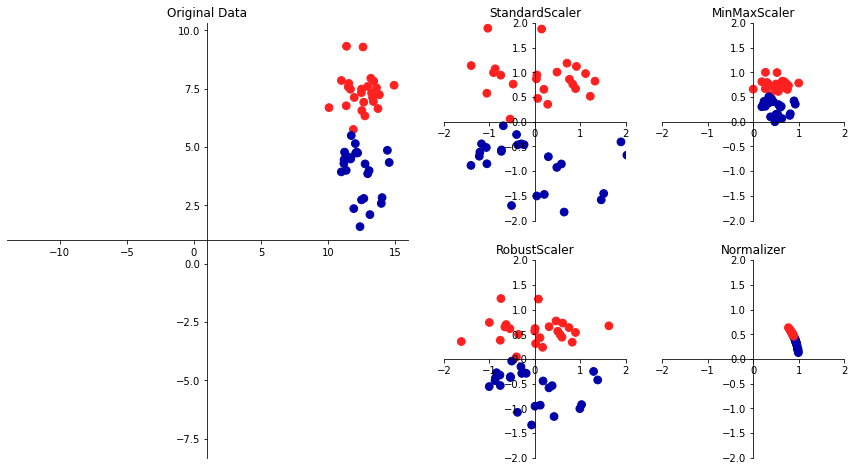

In [47]:
mglearn.plots.plot_scaling()

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [50]:
scaler.fit(X_train)

MinMaxScaler()

In [51]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정전 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정전 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정전 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정전 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [52]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정전 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정전 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정전 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정전 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

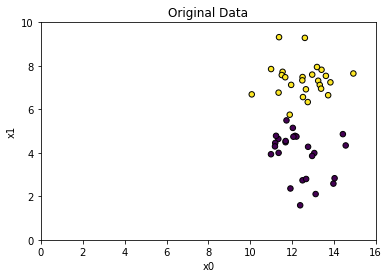

In [54]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel("x0")
plt.ylim(0, 10)
plt.ylabel("x1")
plt.title("Original Data")
plt.show()

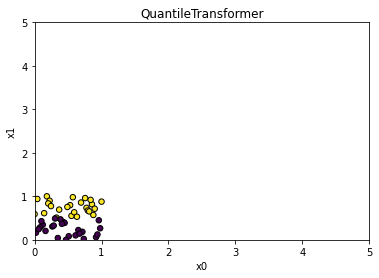

In [55]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel("x0")
plt.ylim(0, 5)
plt.ylabel("x1")
plt.title(type(scaler).__name__)
plt.show()

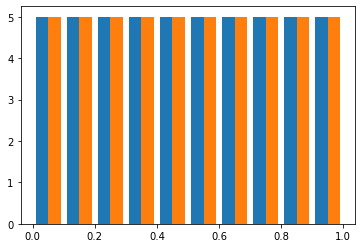

In [56]:
plt.hist(X_trans)
plt.show()

In [57]:
print(scaler.quantiles_.shape)

(50, 2)


In [58]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [59]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


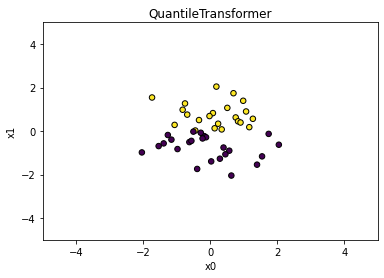

In [60]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

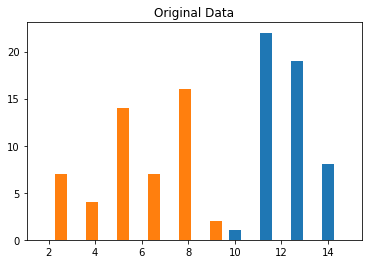

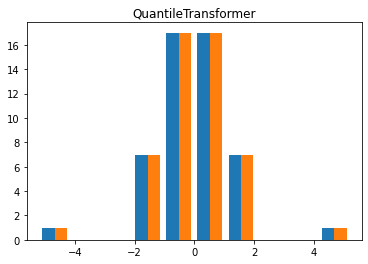

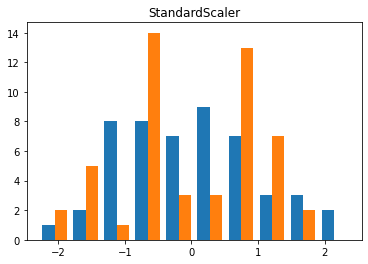

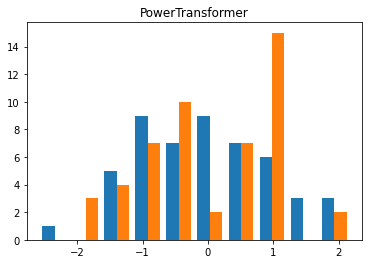

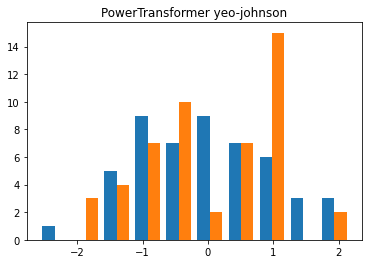

In [61]:
plt.hist(X)
plt.title("Original Data")
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer")
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()

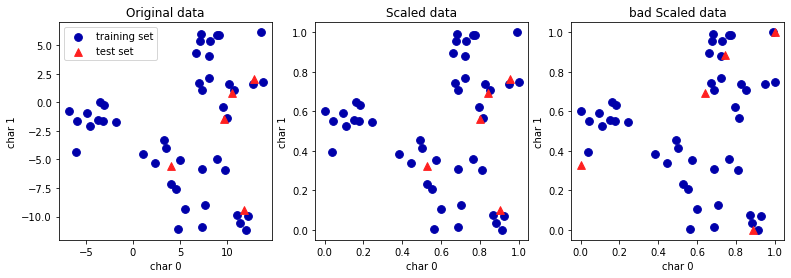

In [62]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original data")

# MinMaxScaler를 사용해 스케일을 조정합니다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[1].set_title("Scaled data")

# 테스트 세트의 스케일을 따로 조정합니다.
#테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안 됩니다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("bad Scaled data")

for ax in axes:
    ax.set_xlabel("char 0")
    ax.set_ylabel("char 1")

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaning)을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다.
X_scaled_d = scaler.fit_transform(X_train)

In [64]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("test set score: {:.2f}".format(svm.score(X_test,y_test)))

test set score: 0.63


In [65]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVN 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("test scaled set of score: {:.2f}".format(svm.score(X_test_scaled,y_test)))

test scaled set of score: 0.95


In [66]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVN 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("test scaled set of score: {:.2f}".format(svm.score(X_test_scaled,y_test)))

test scaled set of score: 0.97


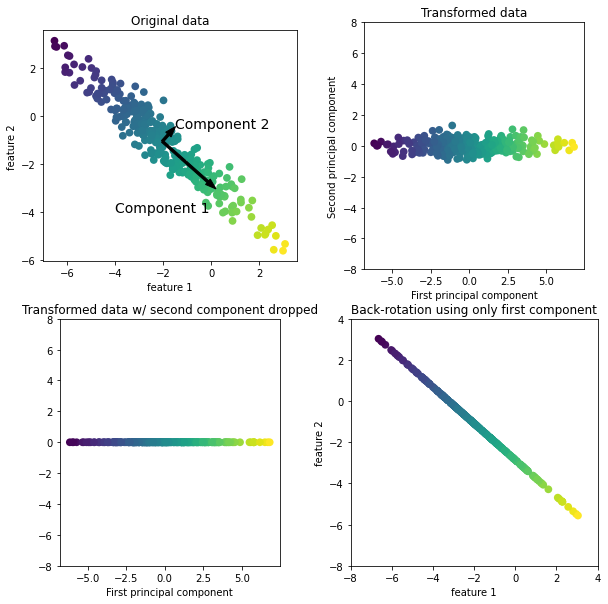

In [67]:
mglearn.plots.plot_pca_illustration()

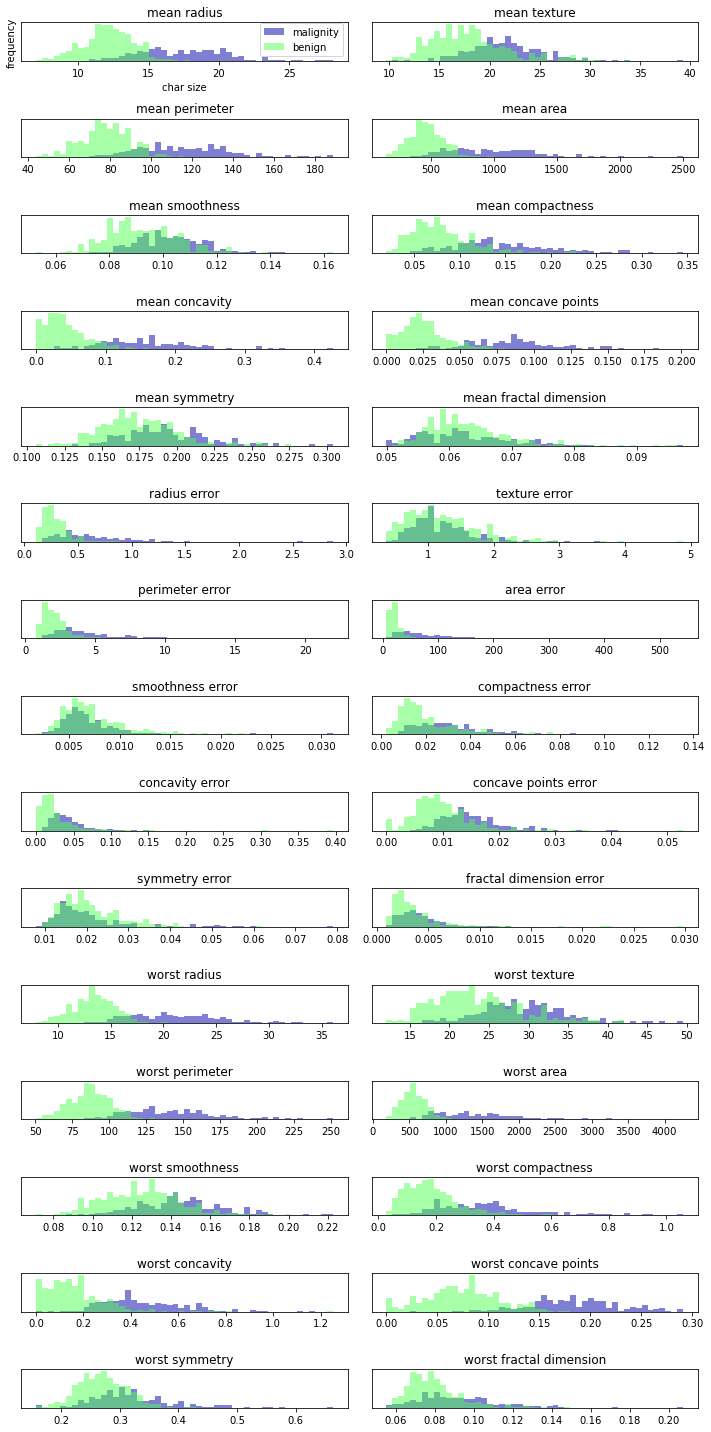

In [68]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
mglignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(mglignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("char size")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignity", "benign"], loc="best")
fig.tight_layout()

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [70]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'second ingredient')

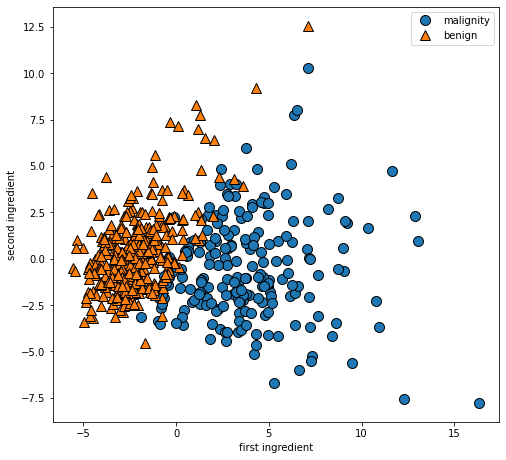

In [71]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignity", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first ingredient")
plt.ylabel("second ingredient")

In [72]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [73]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'component')

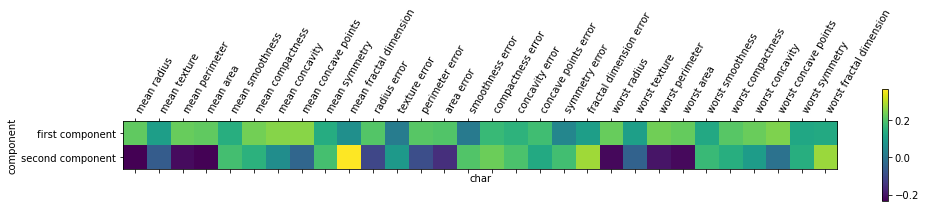

In [74]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("char")
plt.ylabel("component")

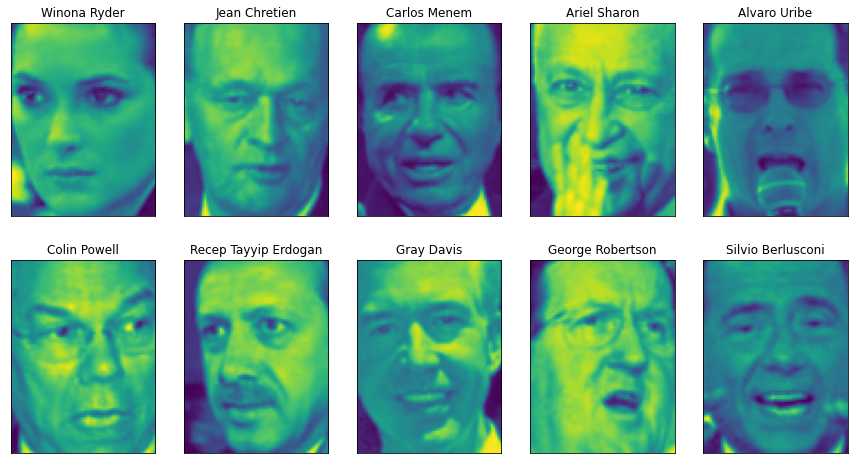

In [75]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, color= False, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [76]:
print("people..images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people..images.shape: (3023, 87, 65)
클래스 개수: 62


In [77]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [78]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
    
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.    

In [79]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-neighbors test set score: {:.2f}".format(knn.score(X_test, y_test)))

1-neighbors test set score: 0.23


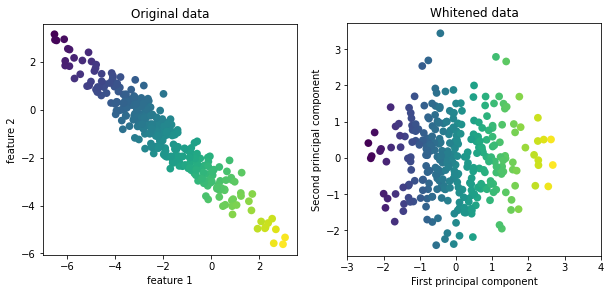

In [80]:
mglearn.plots.plot_pca_whitening()

In [81]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)


In [82]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("test set score: {:.2f}".format(knn.score(X_test_pca, y_test)))

test set score: 0.31


In [83]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


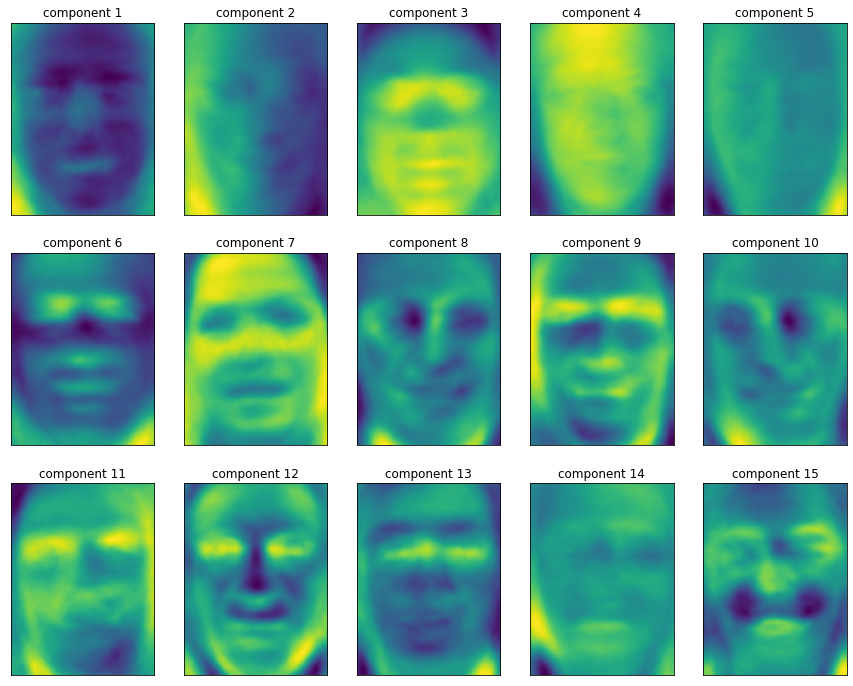

In [84]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("component {}".format((i + 1)))

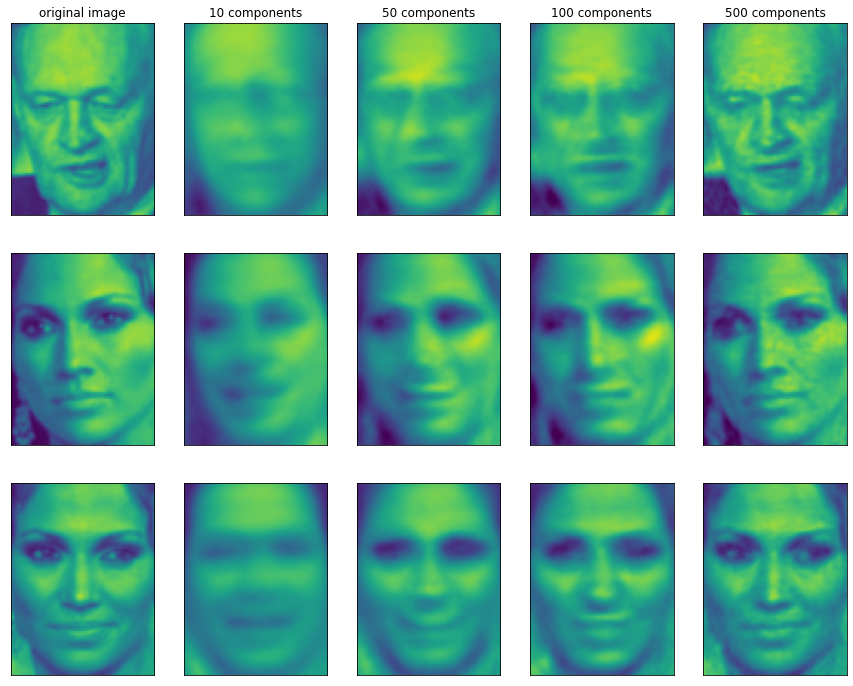

In [85]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'second component')

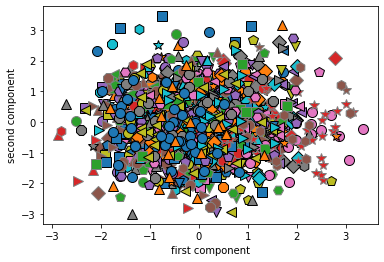

In [86]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("first component")
plt.ylabel("second component")

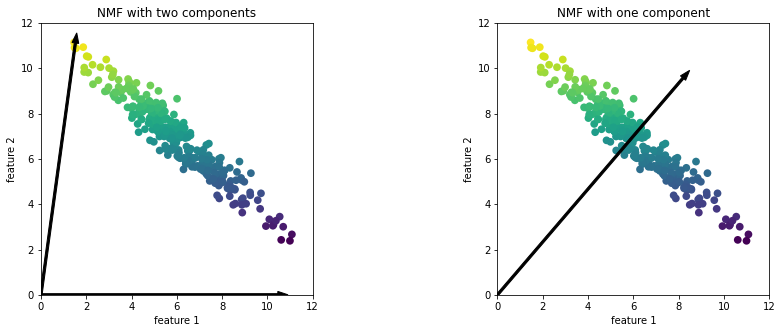

In [87]:
mglearn.plots.plot_nmf_illustration()

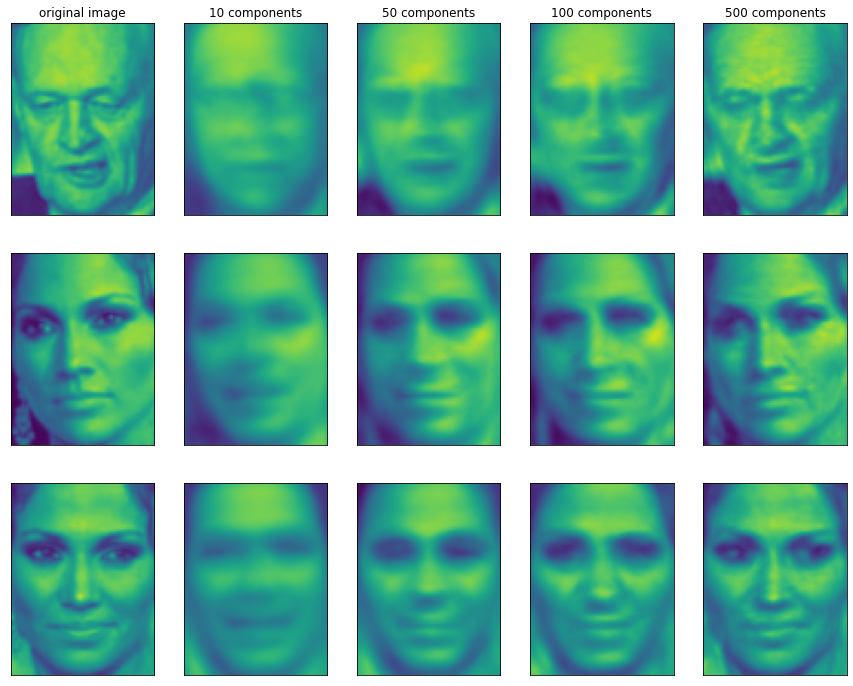

In [88]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

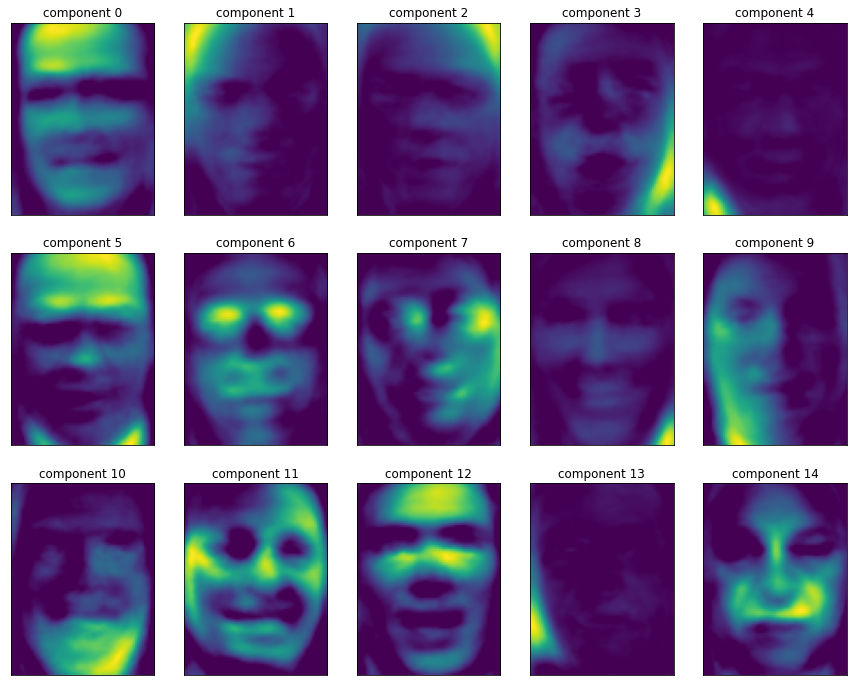

In [90]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (),'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("component {}".format(i))

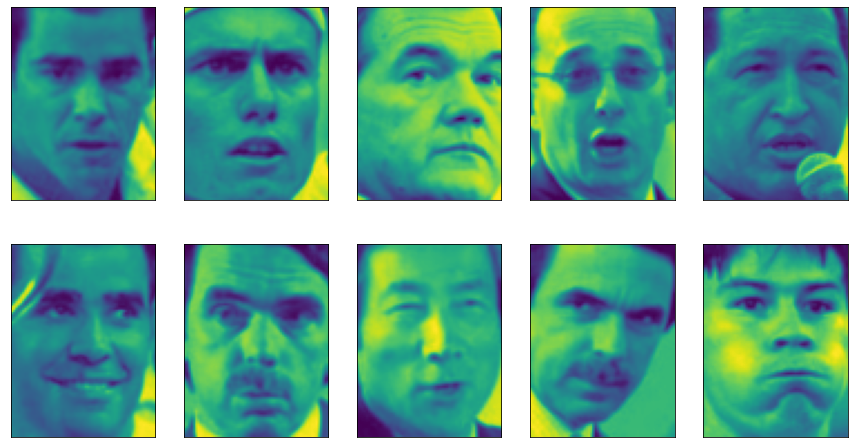

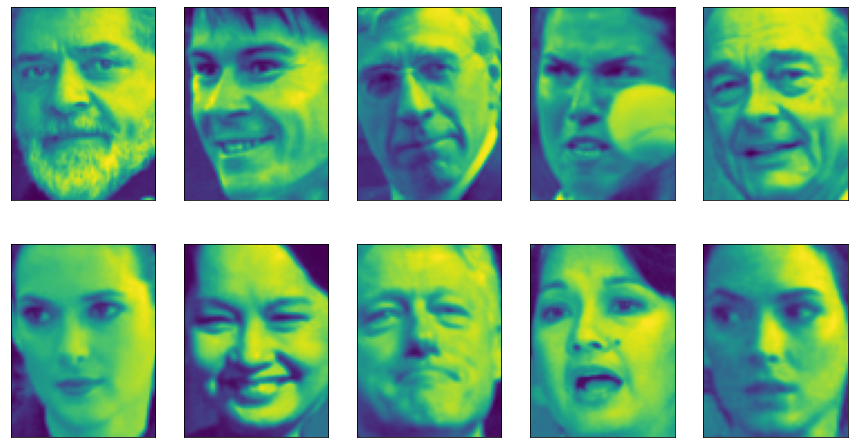

In [93]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (inds, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[inds].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (inds, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[inds].reshape(image_shape))

Text(0, 0.5, 'signals')

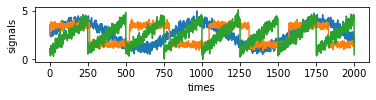

In [94]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("times")
plt.ylabel("signals")

In [96]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다.
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터의 형태:", X.shape)

측정 데이터의 형태: (2000, 100)


In [97]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [99]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

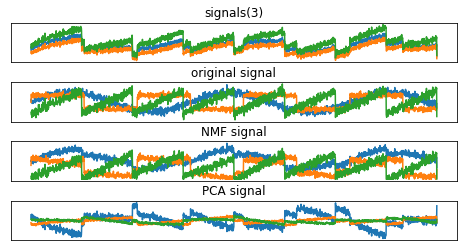

In [100]:
models = [X, S, S_, H]
names = ['signals(3)', 'original signal', 'NMF signal', 'PCA signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

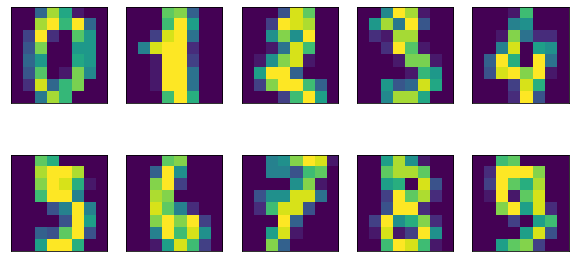

In [101]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'second component')

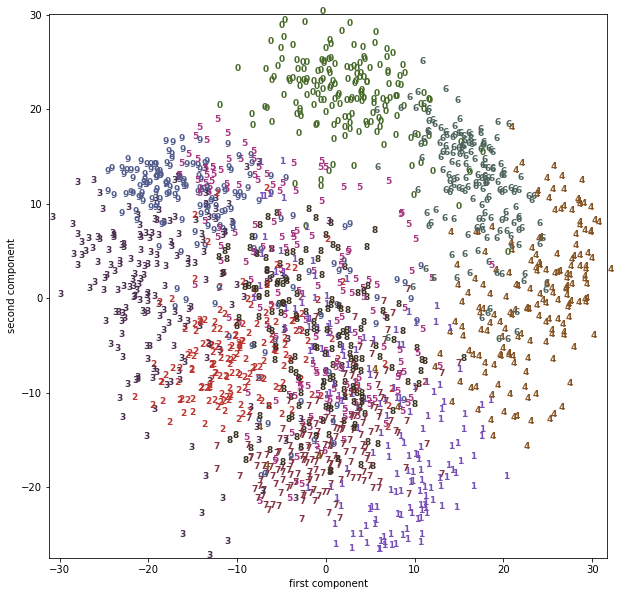

In [103]:
# PCA 모델을 생성합니다.
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
                                                     fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first component")
plt.ylabel("second component")

In [107]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용합니다.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

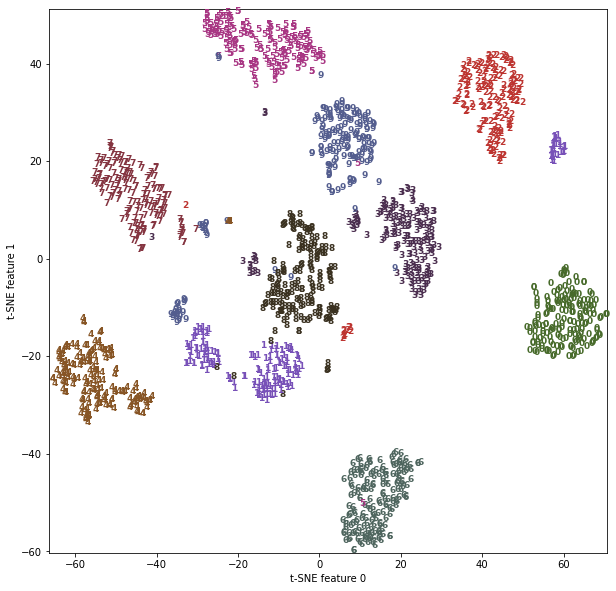

In [108]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
                                                     fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

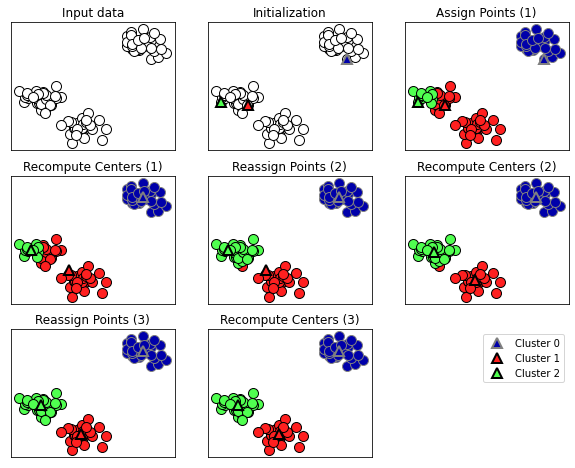

In [109]:
mglearn.plots.plot_kmeans_algorithm()

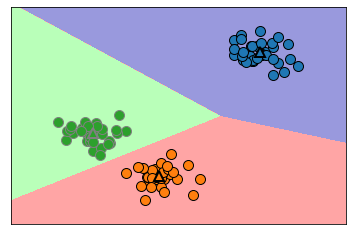

In [110]:
mglearn.plots.plot_kmeans_boundaries()

In [111]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [114]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [115]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


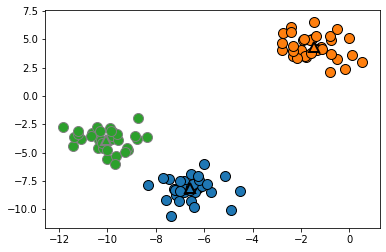

In [118]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

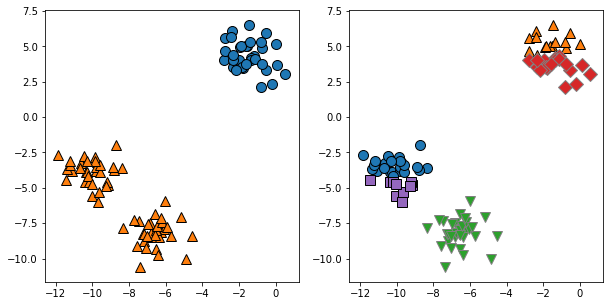

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'feature 1')

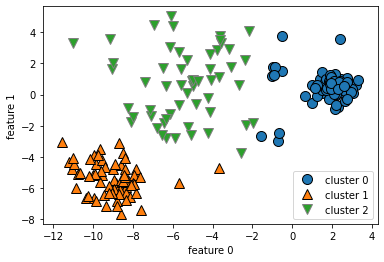

In [121]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

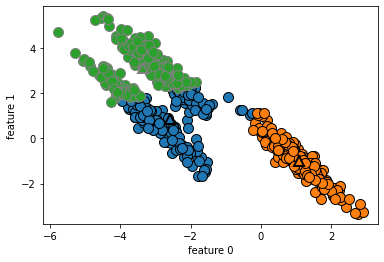

In [123]:
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

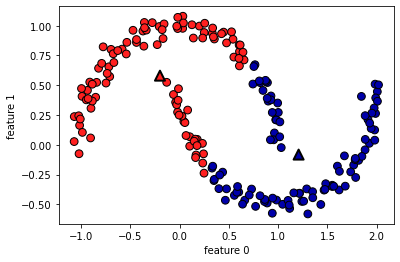

In [127]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다.)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)],
               s=100, linewidth=2, edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

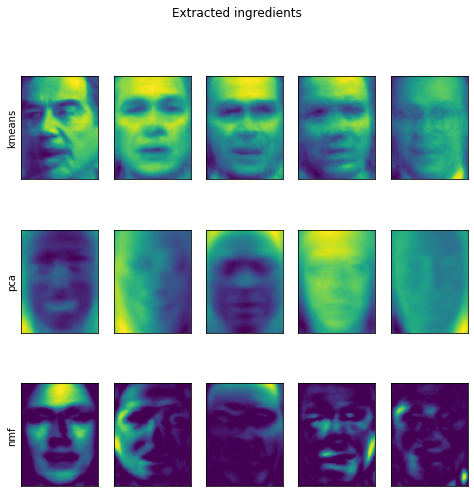

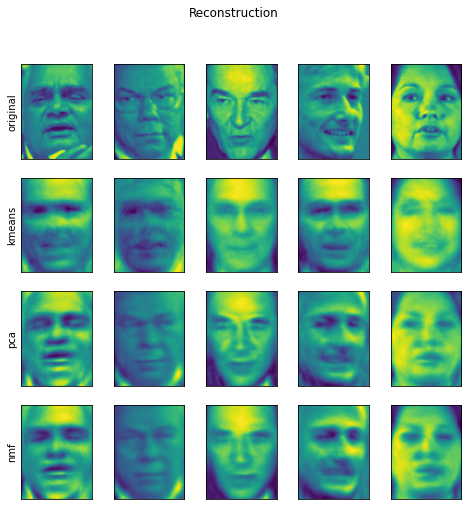

In [133]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted ingredients")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstruction")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

cluster label:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


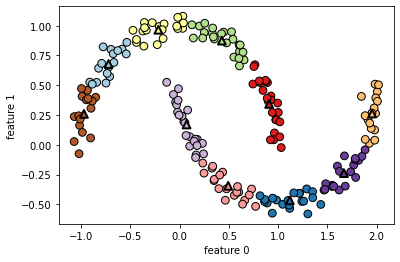

In [141]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters),
           linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
print("cluster label:\n", y_pred)

In [142]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


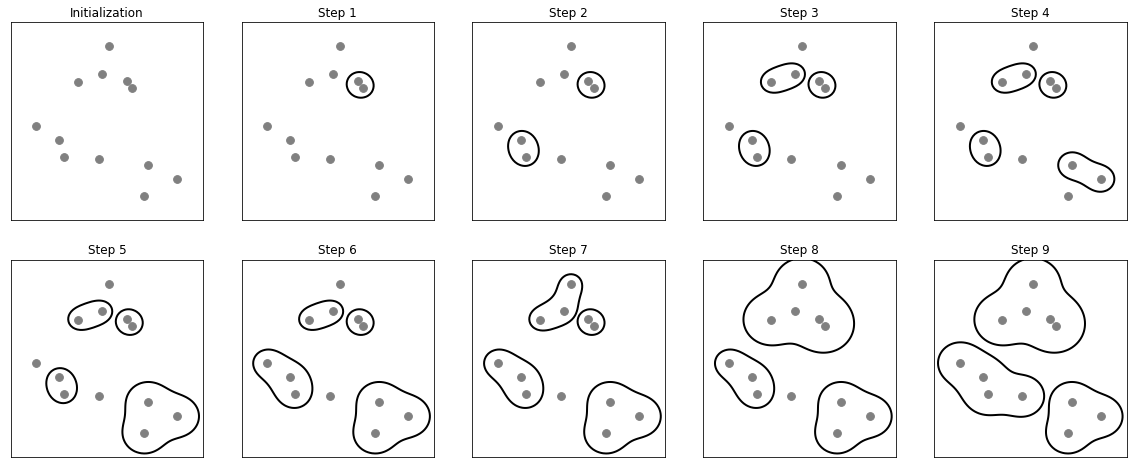

In [143]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

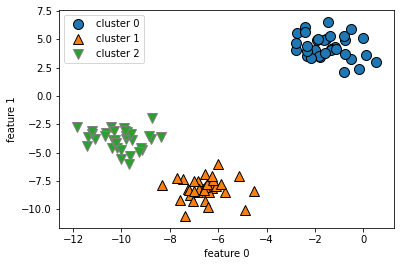

In [144]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'cluster distance')

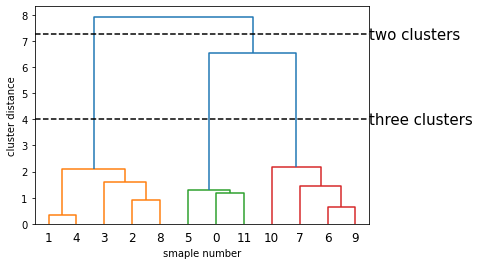

In [146]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용합니다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환합니다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다.
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
plt.xlabel("smaple number")
plt.ylabel("cluster distance")
